<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
# Display column names, data types, and summary information
print("Dataset Information:")
print("="*60)
df.info()

print("\n" + "="*60 + "\n")

# Display the shape of the dataset
print(f"Dataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\n" + "="*60 + "\n")

# Display column names
print("Column Names:")
print(list(df.columns))

print("\n" + "="*60 + "\n")

# Display summary statistics
print("Summary Statistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


Dataset Shape: (65437, 114)
Number of rows: 65437
Number of columns: 114


Column Names:
['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith'

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
# Identify missing values in the dataset
print("Missing Values in Dataset:")
print("="*60)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})

print(missing_summary[missing_summary['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

print("\n" + "="*60 + "\n")

# Impute or remove missing values as necessary
# Strategy 1: Fill numerical columns with median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Filled '{col}' with median: {median_value}")

print("\n" + "="*60 + "\n")

# Strategy 2: Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
        df[col].fillna(mode_value, inplace=True)
        print(f"Filled '{col}' with mode: {mode_value}")

print("\n" + "="*60 + "\n")

# Verify missing values after handling
print("Missing values after handling:")
print(df.isnull().sum().sum())

Missing Values in Dataset:
                            Missing Count  Percentage
AINextMuch less integrated          64289   98.245641
AINextLess integrated               63082   96.401119
AINextNo change                     52939   80.900714
AINextMuch more integrated          51999   79.464217
EmbeddedAdmired                     48704   74.428840
...                                   ...         ...
YearsCode                            5568    8.508948
NEWSOSites                           5151    7.871693
LearnCode                            4949    7.563000
EdLevel                              4653    7.110656
AISelect                             4530    6.922689

[109 rows x 2 columns]


Filled 'CompTotal' with median: 110000.0
Filled 'WorkExp' with median: 9.0
Filled 'JobSatPoints_1' with median: 10.0
Filled 'JobSatPoints_4' with median: 0.0
Filled 'JobSatPoints_5' with median: 0.0
Filled 'JobSatPoints_6' with median: 20.0
Filled 'JobSatPoints_7' with median: 15.0
Filled 'JobSatPo

/tmp/ipykernel_1657/2616335683.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
/tmp/ipykernel_1657/2616335683.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Filled 'TechDoc' with mode: API document(s) and/or SDK document(s);User guides or README files found in the source repository;Traditional public search engine
Filled 'YearsCode' with mode: 10
Filled 'YearsCodePro' with mode: 2
Filled 'DevType' with mode: Developer, full-stack
Filled 'OrgSize' with mode: 20 to 99 employees
Filled 'PurchaseInfluence' with mode: I have some influence
Filled 'BuyNewTool' with mode: Start a free trial;Ask developers I know/work with;Visit developer communities like Stack Overflow
Filled 'BuildvsBuy' with mode: Is ready-to-go but also customizable for growth and targeted use cases
Filled 'TechEndorse' with mode: APIs;Customization;Reputation for quality and excellence
Filled 'Country' with mode: United States of America
Filled 'Currency' with mode: EUR European Euro
Filled 'LanguageHaveWorkedWith' with mode: HTML/CSS;JavaScript;TypeScript
Filled 'LanguageWantToWorkWith' with mode: Python
Filled 'LanguageAdmired' with mode: Python
Filled 'DatabaseHaveWorkedWi

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
# Examine key columns: Employment, JobSat, and YearsCodePro
key_columns = ['Employment', 'JobSat', 'YearsCodePro']

for col in key_columns:
    if col in df.columns:
        print(f"\nAnalysis of '{col}' column:")
        print("="*60)
        print(f"Data type: {df[col].dtype}")
        print(f"\nValue counts:")
        print(df[col].value_counts())
        print(f"\nTop 10 values:")
        print(df[col].value_counts().head(10))
        print("\n" + "="*60 + "\n")


Analysis of 'Employment' column:
Data type: object

Value counts:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                              

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


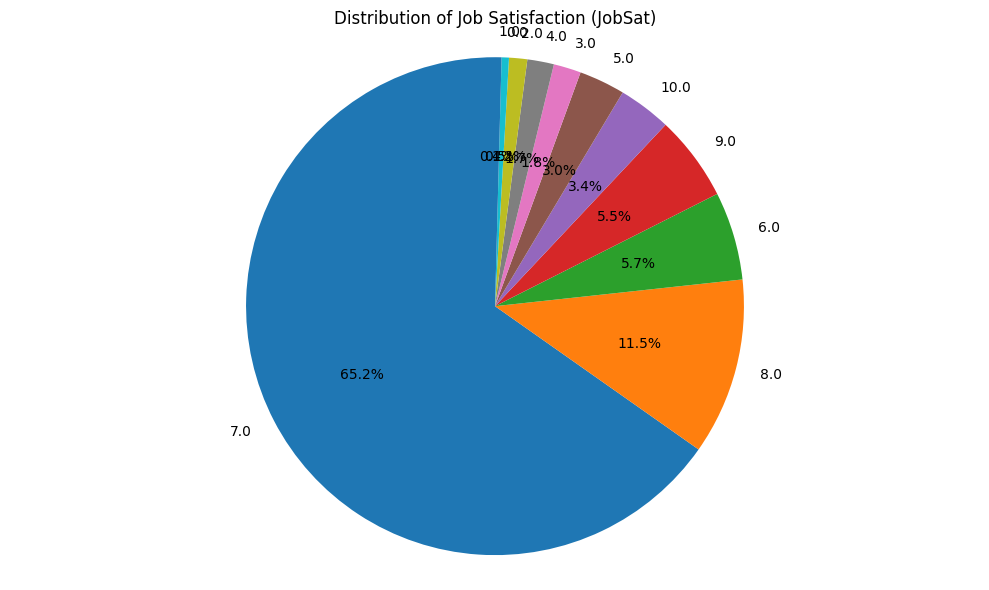

ModuleNotFoundError: No module named 'scipy'

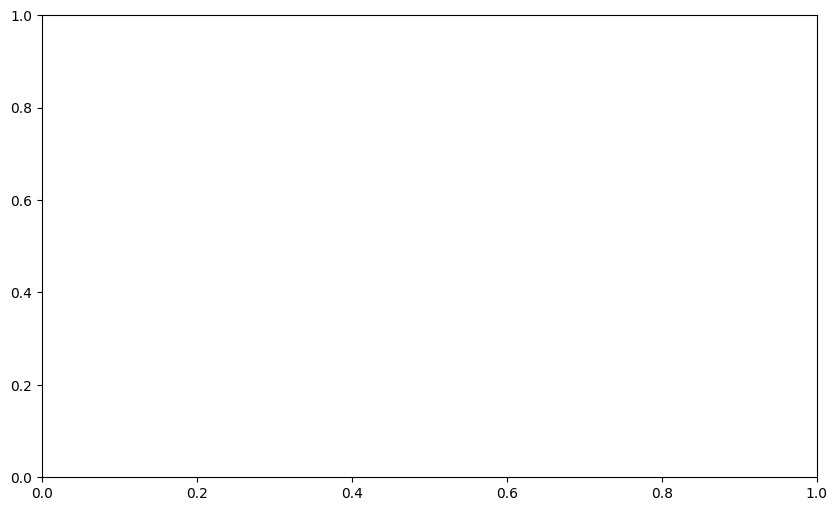

In [6]:
# Create a pie chart or KDE plot to visualize the distribution of JobSat
if 'JobSat' in df.columns:
    # Pie Chart
    plt.figure(figsize=(10, 6))
    jobsat_counts = df['JobSat'].value_counts()
    plt.pie(jobsat_counts, labels=jobsat_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribution of Job Satisfaction (JobSat)')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*60 + "\n")
    
    # KDE Plot (if JobSat is numerical)
    plt.figure(figsize=(10, 6))
    df['JobSat'].plot(kind='kde', color='blue', linewidth=2)
    plt.title('KDE Plot of Job Satisfaction')
    plt.xlabel('Job Satisfaction Score')
    plt.ylabel('Density')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Interpretation
    print("\nKey Trends in Job Satisfaction:")
    print(f"- Most common satisfaction level: {df['JobSat'].mode()[0]}")
    print(f"- Mean satisfaction: {df['JobSat'].mean():.2f}")
    print(f"- Median satisfaction: {df['JobSat'].median()}")

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


<Figure size 1400x800 with 0 Axes>

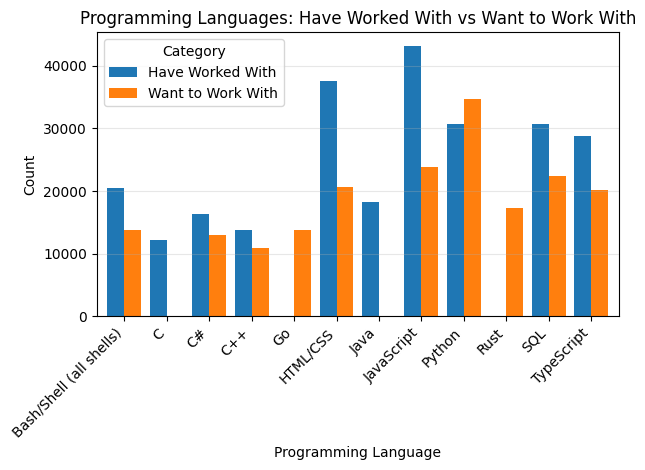


Top 10 Languages - Have Worked With:
LanguageHaveWorkedWith
JavaScript                 43184
HTML/CSS                   37508
Python                     30719
SQL                        30682
TypeScript                 28842
Bash/Shell (all shells)    20412
Java                       18239
C#                         16318
C++                        13827
C                          12184
Name: count, dtype: int64

Top 10 Languages - Want to Work With:
LanguageWantToWorkWith
Python                     34732
JavaScript                 23774
SQL                        22400
HTML/CSS                   20721
TypeScript                 20239
Rust                       17232
Go                         13837
Bash/Shell (all shells)    13744
C#                         12921
C++                        10873
Name: count, dtype: int64


In [7]:
# Compare the frequency of programming languages
if 'LanguageHaveWorkedWith' in df.columns and 'LanguageWantToWorkWith' in df.columns:
    # Split and count languages (assuming semicolon-separated)
    languages_have = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode()
    languages_want = df['LanguageWantToWorkWith'].dropna().str.split(';').explode()
    
    have_counts = languages_have.value_counts().head(10)
    want_counts = languages_want.value_counts().head(10)
    
    # Create comparison DataFrame
    comparison_df = pd.DataFrame({
        'Have Worked With': have_counts,
        'Want to Work With': want_counts
    }).fillna(0)
    
    # Visualize with grouped bar chart
    plt.figure(figsize=(14, 8))
    comparison_df.plot(kind='bar', width=0.8)
    plt.title('Programming Languages: Have Worked With vs Want to Work With')
    plt.xlabel('Programming Language')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Category')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Languages - Have Worked With:")
    print(have_counts)
    print("\nTop 10 Languages - Want to Work With:")
    print(want_counts)

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


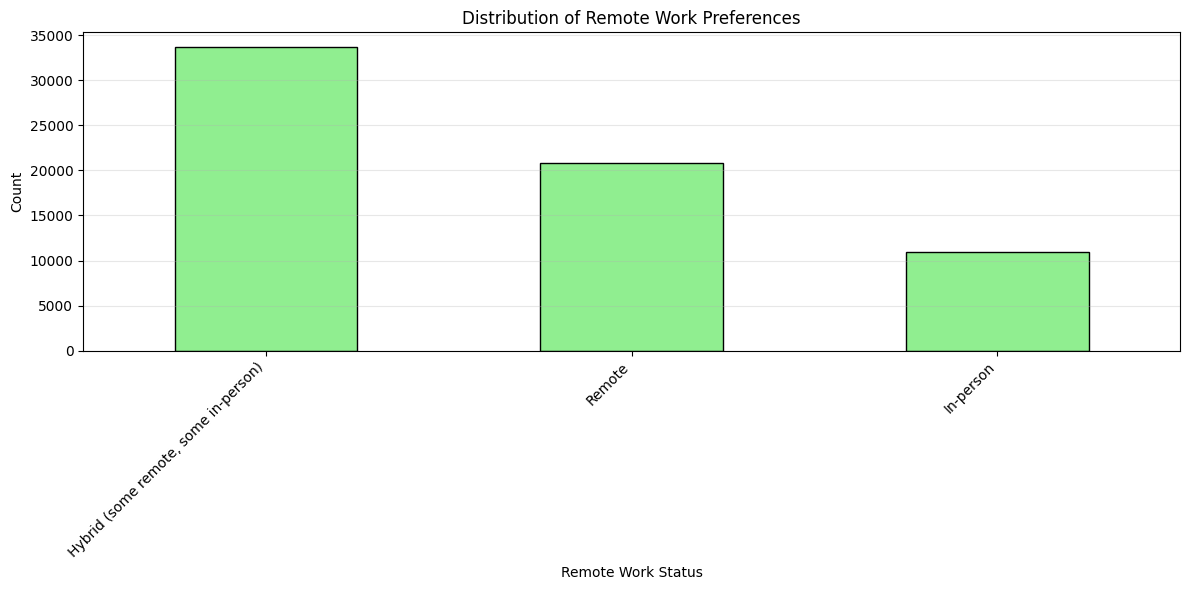

<Figure size 1400x800 with 0 Axes>

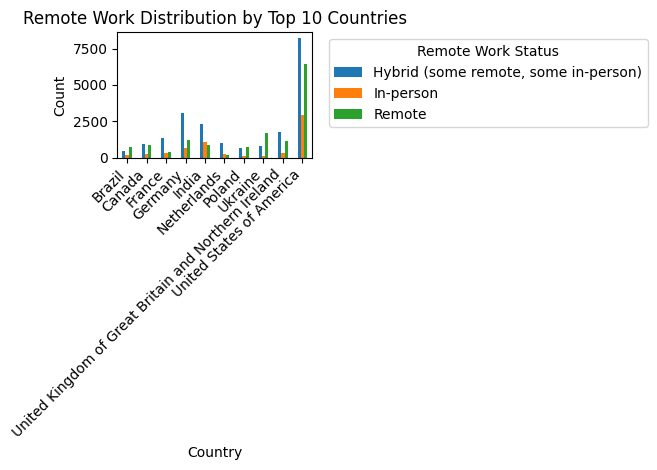

In [8]:
# Visualize the distribution of RemoteWork by region
if 'RemoteWork' in df.columns:
    # Overall distribution
    plt.figure(figsize=(12, 6))
    remotework_counts = df['RemoteWork'].value_counts()
    remotework_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title('Distribution of Remote Work Preferences')
    plt.xlabel('Remote Work Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # If Country column exists, create grouped bar chart by region
    if 'Country' in df.columns:
        top_countries = df['Country'].value_counts().head(10).index
        df_top_countries = df[df['Country'].isin(top_countries)]
        
        # Create cross-tabulation
        remote_by_country = pd.crosstab(df_top_countries['Country'], df_top_countries['RemoteWork'])
        
        plt.figure(figsize=(14, 8))
        remote_by_country.plot(kind='bar', stacked=False)
        plt.title('Remote Work Distribution by Top 10 Countries')
        plt.xlabel('Country')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Remote Work Status', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [9]:
# Analyze the correlation between JobSat and YearsCodePro
if 'JobSat' in df.columns and 'YearsCodePro' in df.columns:
    # Convert YearsCodePro to numeric
    df['YearsCodePro_Numeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
    
    # Remove missing values for correlation analysis
    correlation_data = df[['YearsCodePro_Numeric', 'JobSat']].dropna()
    
    # Calculate Pearson correlation coefficient
    pearson_corr = correlation_data['YearsCodePro_Numeric'].corr(correlation_data['JobSat'])
    print(f"Pearson Correlation Coefficient: {pearson_corr:.4f}")
    
    # Calculate Spearman correlation coefficient
    spearman_corr = correlation_data['YearsCodePro_Numeric'].corr(correlation_data['JobSat'], method='spearman')
    print(f"Spearman Correlation Coefficient: {spearman_corr:.4f}")
    
    print("\n" + "="*60 + "\n")
    
    # Visualize with scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(correlation_data['YearsCodePro_Numeric'], correlation_data['JobSat'], 
                alpha=0.5, color='purple')
    plt.title(f'Job Satisfaction vs Experience\n(Pearson r={pearson_corr:.4f}, Spearman ρ={spearman_corr:.4f})')
    plt.xlabel('Years of Professional Coding Experience')
    plt.ylabel('Job Satisfaction Score')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Pearson Correlation Coefficient: 0.0665


ModuleNotFoundError: No module named 'scipy'

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


Cross-tabulation: Employment vs Education Level
EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                1059   
Employed, full-time;Employed, part-time                                               9   
Employed, full-time;Independent contractor, fre...                                  104   
Employed, full-time;Independent contractor, fre...                                   11   
Employed, full-time;Independent contractor, fre...                                    0   
...                                                                                 ...   
Student, full-time;Student, part-time;Retired                                         0   
Student, part-time                                                                   12   
Student, part-time;Employed, part-time    

/tmp/ipykernel_1657/2936907421.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

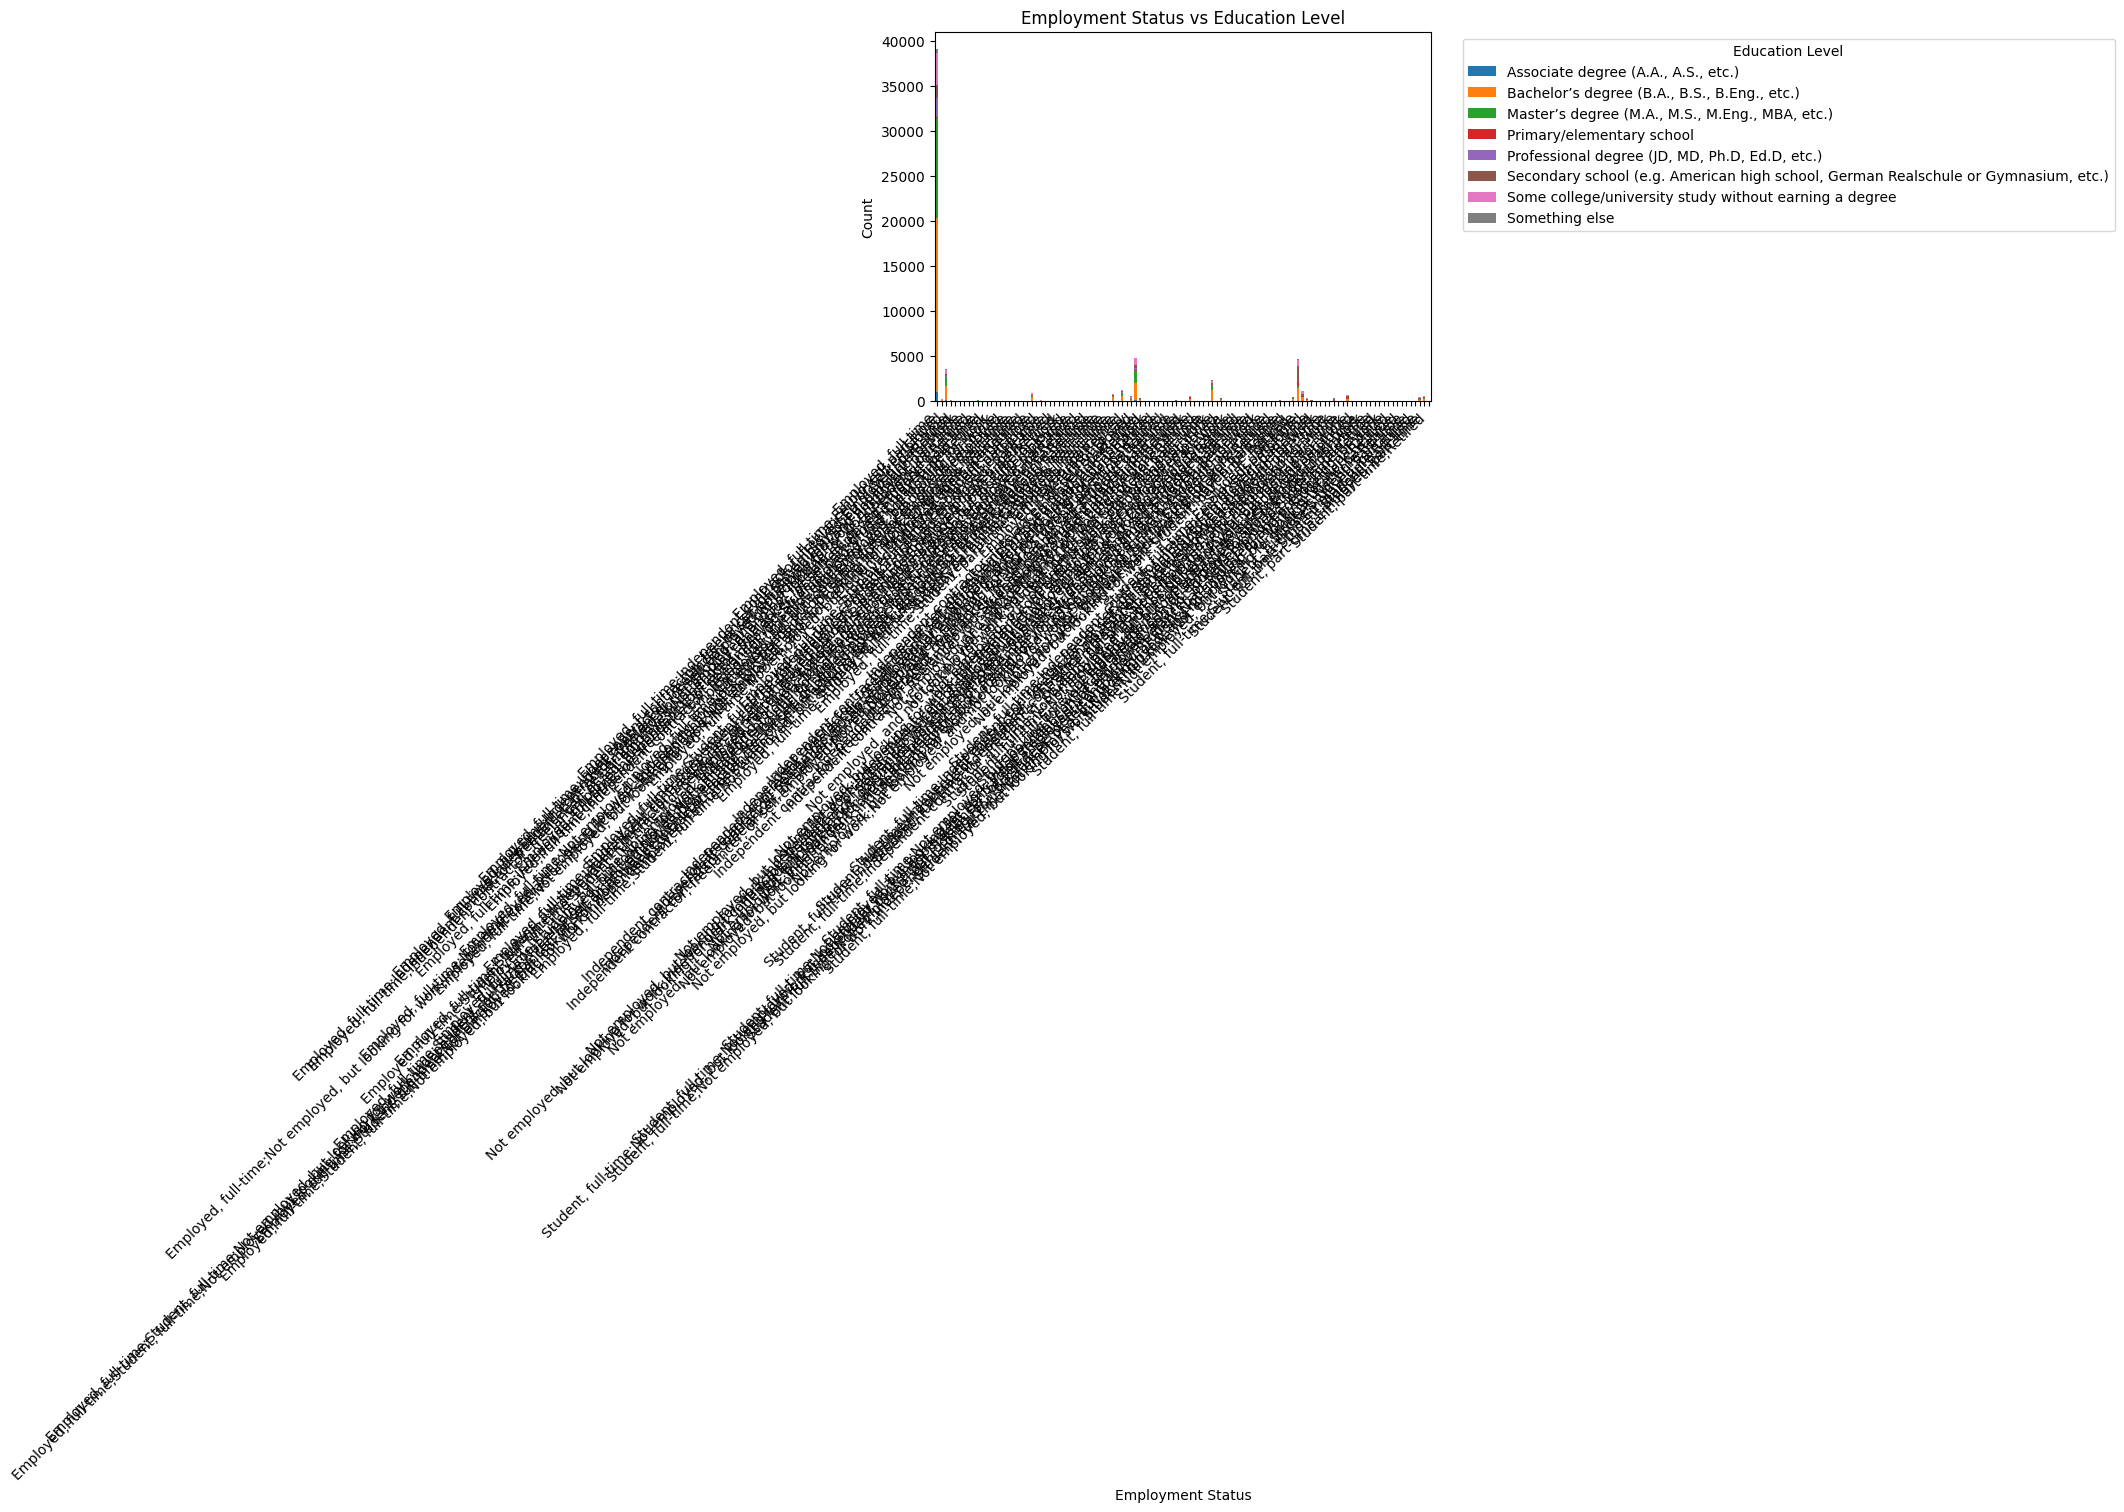

In [10]:
# Analyze the relationship between Employment and EdLevel
if 'Employment' in df.columns and 'EdLevel' in df.columns:
    # Create cross-tabulation
    employment_education = pd.crosstab(df['Employment'], df['EdLevel'], margins=True)
    
    print("Cross-tabulation: Employment vs Education Level")
    print("="*60)
    print(employment_education)
    
    print("\n" + "="*60 + "\n")
    
    # Visualize with stacked bar plot
    employment_education_no_margins = pd.crosstab(df['Employment'], df['EdLevel'])
    
    plt.figure(figsize=(14, 8))
    employment_education_no_margins.plot(kind='bar', stacked=True)
    plt.title('Employment Status vs Education Level')
    plt.xlabel('Employment Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [11]:
# Save the cleaned dataset to a new CSV file
output_filename = 'cleaned_distributed_data.csv'
df.to_csv(output_filename, index=False)

print(f"Cleaned dataset saved successfully as '{output_filename}'")
print(f"\nFinal Dataset Summary:")
print(f"- Total rows: {df.shape[0]}")
print(f"- Total columns: {df.shape[1]}")
print(f"- Missing values: {df.isnull().sum().sum()}")
print(f"- Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Cleaned dataset saved successfully as 'cleaned_distributed_data.csv'

Final Dataset Summary:
- Total rows: 65437
- Total columns: 115
- Missing values: 2906
- Memory usage: 510.60 MB


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
